In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
dataset = pd.read_csv("D:/ML Course/Projects/Decision Tree  project 1/iris.csv")

In [3]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

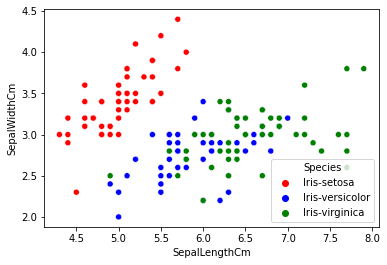

In [5]:
#different types of species present in iris data set is plotted
sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['red','blue','green'])

In [6]:
#shape of the dataset
dataset.shape

(150, 6)

In [7]:
#Split the dataset into training and testing dataset
#training dataset is 80% and testing dataset is 20%
train_size = 0.8
split_index = int(train_size * len(dataset))

# Use iloc to create training and testing sets
train_df = dataset.iloc[:split_index]
test_df = dataset.iloc[split_index:]

In [8]:
#class for Tree data structure to store the decision tree and to predict later
class Tree:
    def __init__(self ,feature = None ,threshold = 0 ,left = None ,right = None, value = None ):
        self.left = left
        self.right = right
        self.value = value
        self.feature = feature
        self.threshold = threshold
        
    def print_tree(self):
        if self.left is not None:
            self.left.print_tree()
        print("feature = ",self.feature, "and the split value is = ",self.threshold," The value is ",self.value)
        if self.right is not None:
            self.right.print_tree()

In [9]:
#entropy calculation 
def entropy(variables):
    total = len(variables)
    
    frequency = {}
    
    for value in variables:
        if value in frequency:
            frequency[value] += 1
        else:
            frequency[value] = 1
        
#     print(frequency)
            
    result = 0
    
    for value,count in frequency.items():
        prob = count/total
        if(prob != 0):
            result += -(prob) * math.log(prob,2)
    
    return result


In [10]:
#best fit returns the list of best fitting thresholds of a feature
def best_fit(variables):
#     print("variables ",variables)
    uniqueValues = list(set(variables))
    uniqueValues.sort()
#     print(uniqueValues)
    thresholds = []
    for i in range(0,len(uniqueValues)-1):
        temp = uniqueValues[i] + uniqueValues[i+1]
        temp = temp/2
        thresholds.append(temp)
    
    return thresholds

# print(best_fit(dataset["SepalWidthCm"]))
    

In [11]:
#split the left subset of the dataset based on condition dataset[feature] < threshold
def split_left(dataset,feature,threshold):
    return dataset[dataset[feature] < threshold]

In [12]:
#split the right subset of the dataset based on condition dataset[feature] >= threshold
def split_right(dataset,feature,threshold):
    return dataset[dataset[feature] >= threshold]

In [13]:
#sample split
print(split_left(train_df,"SepalWidthCm",3))
print()
print(split_right(train_df,"SepalWidthCm",3))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
8      9            4.4           2.9            1.4           0.2   
41    42            4.5           2.3            1.3           0.3   
53    54            5.5           2.3            4.0           1.3   
54    55            6.5           2.8            4.6           1.5   
55    56            5.7           2.8            4.5           1.3   
57    58            4.9           2.4            3.3           1.0   
58    59            6.6           2.9            4.6           1.3   
59    60            5.2           2.7            3.9           1.4   
60    61            5.0           2.0            3.5           1.0   
62    63            6.0           2.2            4.0           1.0   
63    64            6.1           2.9            4.7           1.4   
64    65            5.6           2.9            3.6           1.3   
67    68            5.8           2.7            4.1           1.0   
68    69            

In [14]:
#find which species is dominant or most occured in a node
def dominant_species(node):
    frequency = {} #a dictionary
    
    for species in node:
        if species in frequency:
            frequency[species] += 1
        else:
            frequency[species] = 1
    
    print(frequency)
    
    maximum = 0
    species = ""
    
    for key,value in frequency.items():
        if(frequency[key] > maximum):
            maximum = frequency[key]
            species = key
    
    return species
    

In [15]:
#fit or train the model
def fit(parent,depth,maximum_depth):
    
    #if the node is at the maximum depth it should stop growing.
    #if the node is still heterogeneous(more than one species) the result at this node is most dominant class in that node.
    #That is the species  with most frequency in this node. 
    if(depth == maximum_depth):  
        species = dominant_species(parent["Species"])
        print("species = ",species)
        return Tree(value = species)

    features = parent.columns.tolist()
    features.remove("Species")
    features.remove("Id")
    #print(features)
    
    parent_entropy = entropy(parent["Species"])
        
    maximum_information_gain = 0
    maximum_information_gain_threshold = 0
    maximum_information_gain_feature = ""
    left_node = None
    right_node = None
    left_node_entropy = 0
    right_node_entropy = 0
    left_subtree = None
    right_subtree = None
            
    for feature in features:
                
        thresholds = best_fit(parent[feature])
        #print(thresholds)
                
        for threshold in thresholds:
            left = split_left(parent,feature,threshold)
            right = split_right(parent,feature,threshold)
            
            #child entropy calculation
            left_entropy = (len(left)/len(parent)) * entropy(left["Species"])
            right_entropy = (len(right)/len(parent)) * entropy(right["Species"])
            child_entropy = left_entropy + right_entropy
            
            #print("child entropy ",child_entropy)
            
            information_gain = parent_entropy - child_entropy
            #print("information gain ",information_gain)
            
            if(information_gain > maximum_information_gain):
                maximum_information_gain = information_gain
                max_ig_threshold = threshold #maximum information gained threshold
                max_ig_feature = feature #maximum information gained feature
                left_node = left
                right_node = right
                left_node_entropy = left_entropy
                right_node_entropy = right_entropy
        
    if(maximum_information_gain == 0):
        return Tree(value=parent['Species'].iloc[0])
        
    elif(maximum_information_gain != 0):
            
        print()
        print(f"FEATURE : {max_ig_feature}")
        print(f"MAXIMUM INFORMATION GAINED : {maximum_information_gain}")
        print(f"SPLITTED AS {max_ig_feature} < {max_ig_threshold} AND {max_ig_feature} >= {max_ig_threshold}")
        print()
        print(f"LEFT NODE WITH ENTROPY = ",entropy(left_node["Species"]))
        print(left_node)
        print()
        print(f"RIGHT NODE WITH ENTROPY = ",entropy(right_node["Species"]))
        print(right_node)

        if left_node is not None :
            left_subtree = fit(left_node, depth + 1, maximum_depth)
                    
        if right_node is not None :
            right_subtree = fit(right_node, depth + 1, maximum_depth)
        
        
    return Tree(max_ig_feature,max_ig_threshold,left_subtree,right_subtree)
        
          
        

In [16]:
#predict a test dataset with trained model by traversing the trained model decision tree
def predict(dataset,obj):
    while(obj.left != None and obj.right != None ):
        feature = obj.feature
        threshold = obj.threshold
        if(dataset[feature] < threshold):
            obj = obj.left
        else:
            obj = obj.right 
    return obj.value
    

In [17]:
#function to calculate the accuracy of the trained model
def accuracy(predictions,actual_values):
    #print(actual_values)
    total_predictions = len(predictions)
    correct_predictions = 0
    print("predictions\tactual values\n")
    for i in range(0,total_predictions):
        print(predictions[i], " ", actual_values[i])
        if(predictions[i] == actual_values[i]):
            correct_predictions = correct_predictions + 1
    
    return (correct_predictions/total_predictions) * 100
        

In [18]:
#create a decision tree model with training dataset with max depth of 10
iris_decision_tree_model = fit(train_df,0,10)
iris_decision_tree_model.print_tree()


FEATURE : PetalLengthCm
MAXIMUM INFORMATION GAINED : 0.9798687566511526
SPLITTED AS PetalLengthCm < 2.45 AND PetalLengthCm >= 2.45

LEFT NODE WITH ENTROPY =  0.0
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5       


FEATURE : SepalLengthCm
MAXIMUM INFORMATION GAINED : 0.10290984340876955
SPLITTED AS SepalLengthCm < 4.95 AND SepalLengthCm >= 4.95

LEFT NODE WITH ENTROPY =  1.0
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
57    58            4.9           2.4            3.3           1.0   
106  107            4.9           2.5            4.5           1.7   

             Species  
57   Iris-versicolor  
106   Iris-virginica  

RIGHT NODE WITH ENTROPY =  0.0
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50   51            7.0           3.2            4.7           1.4   
51   52            6.4           3.2            4.5           1.5   
52   53            6.9           3.1            4.9           1.5   
53   54            5.5           2.3            4.0           1.3   
54   55            6.5           2.8            4.6           1.5   
55   56            5.7           2.8            4.5           1.3   
56   57            6.3           3.3     

feature =  None and the split value is =  0  The value is  Iris-setosa
feature =  PetalLengthCm and the split value is =  2.45  The value is  None
feature =  None and the split value is =  0  The value is  Iris-versicolor
feature =  SepalWidthCm and the split value is =  2.45  The value is  None
feature =  None and the split value is =  0  The value is  Iris-virginica
feature =  SepalLengthCm and the split value is =  4.95  The value is  None
feature =  None and the split value is =  0  The value is  Iris-versicolor
feature =  PetalLengthCm and the split value is =  4.95  The value is  None
feature =  None and the split value is =  0  The value is  Iris-virginica
feature =  SepalWidthCm and the split value is =  2.45  The value is  None
feature =  None and the split value is =  0  The value is  Iris-versicolor
feature =  PetalWidthCm and the split value is =  1.75  The value is  None
feature =  None and the split value is =  0  The value is  Iris-virginica


In [19]:
#test dataset
test_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,121,6.9,3.2,5.7,2.3,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica


In [20]:
#predict and store the results in a list called predictions
predictions = []
for index,rows in test_df.iterrows():
    result = predict(rows,iris_decision_tree_model)
    predictions.append(result)

In [21]:
#calculate the accuracy of the dataset
actual_values = test_df["Species"].reset_index(drop=True)
acc = accuracy(predictions,actual_values)

print("\nACCURACY : ",acc ," percentage")

predictions	actual values

Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-versicolor   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica
Iris-virginica   Iris-virginica

ACCU